Cargar el video desde el Drive

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

# Cargar el video desde el Drive
#drive.mount('/content/drive', force_remount=True)

In [2]:
video = "https://pmc.ncbi.nlm.nih.gov/articles/instance/4539948/bin/NIHMS711755-supplement-Supplementary_Video_3.avi"

cap = cv2.VideoCapture(video)

if not cap.isOpened():
    print("Error: No puede abir el video")

#Información del video
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Información del Video:")
print("  FPS:", fps)
print("  Resolución:", width, "x", height)
print("  Total Tramas:", total_frames)

frame_number = 4
# Set the frame position
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
ret, frame = cap.read()

if ret:
  # Display the frame
  cv2_imshow(frame)
  cv2.destroyAllWindows()
else:
  print("Error: No puede leer el Frame")

Error: No puede abir el video
Información del Video:
  FPS: 0.0
  Resolución: 0 x 0
  Total Tramas: 0
Error: No puede leer el Frame


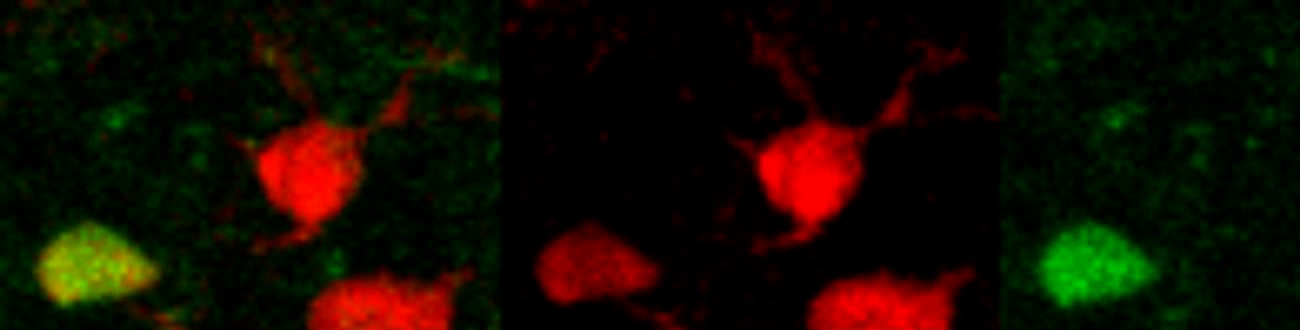

In [3]:
if ret:
  # Región de corte (x, y, width, height)
  x = 0  # Starting x-coordinate
  y = 0   # Starting y-coordinate
  w = 1300  # Width of the cropped region
  h = 330  # Height of the cropped region

  # Crop the image
  cropped_frame = frame[y:y+h, x:x+w]

  # Display the cropped frame
  cv2_imshow(cropped_frame)
  cv2.destroyAllWindows()

  #Para salvar la imagen recortada:
  #cv2.imwrite("cropped_image.jpg", cropped_frame)

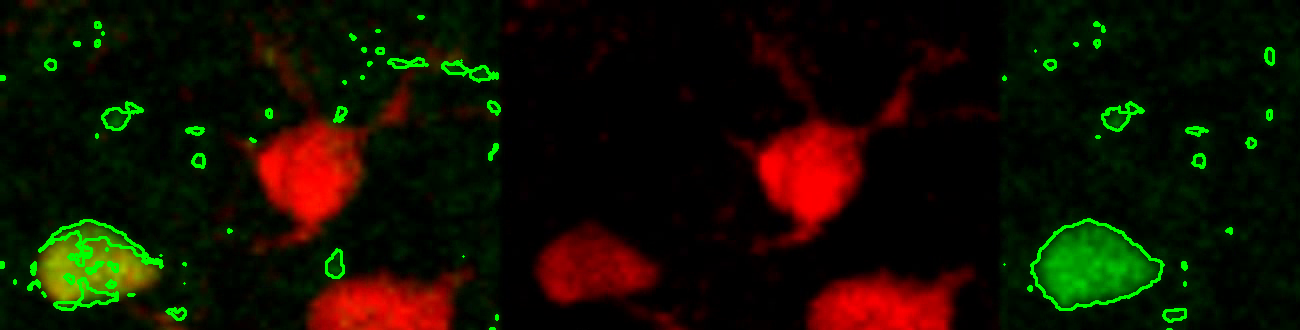

In [4]:
if ret:
  # Convert the cropped frame to HSV color space
  hsv = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2HSV)

  # Define the range of green color in HSV
  lower_green = np.array([40, 40, 40])
  upper_green = np.array([80, 255, 255])

  # Threshold the HSV image to get only green colors
  mask = cv2.inRange(hsv, lower_green, upper_green)

  # Find contours in the mask
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw contours on the original cropped frame
  cv2.drawContours(cropped_frame, contours, -1, (0, 255, 0), 2)  # Green contours

  # Display the original frame with green object contours
  cv2_imshow(cropped_frame)
  cv2.destroyAllWindows()

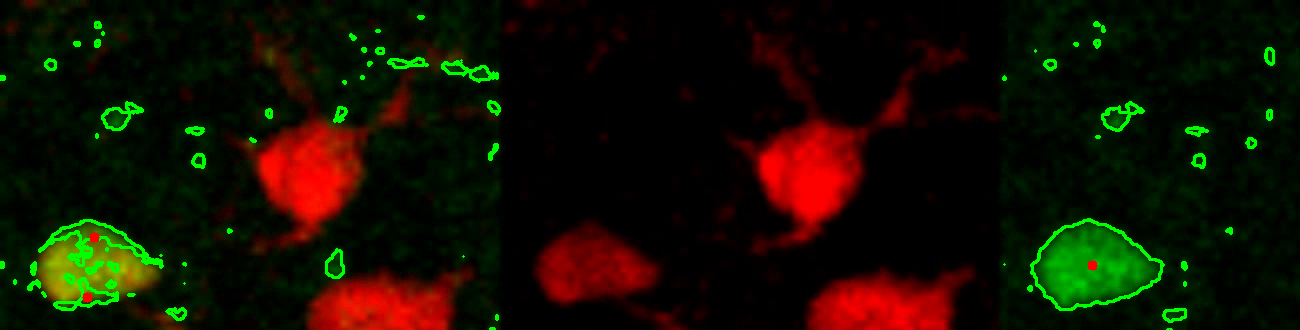

Centroid 1: x=1092, y=265
Centroid 2: x=94, y=237
Centroid 3: x=87, y=297


In [5]:
# Sort contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Get centroid of the 3 largest objects
centroids = []
for i in range(min(3, len(contours))):  # Process only the top 3 contours
    M = cv2.moments(contours[i])
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroids.append((cX, cY))
        # Draw a circle at the centroid
        cv2.circle(cropped_frame, (cX, cY), 5, (0, 0, 255), -1) # Red circle


# Display the original frame with green object contours and centroids
cv2_imshow(cropped_frame)
cv2.destroyAllWindows()

# Print centroid coordinates
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: x={centroid[0]}, y={centroid[1]}")


In [6]:
# Release the video capture object
cap.release()